In [1]:
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# set tf backend to allow memory to grow, instead of claiming everything
import tensorflow as tf

def get_session():
    config = tf.ConfigProto()
    config.gpu_options.allow_growth = True
    return tf.Session(config=config)

# use this environment flag to change which GPU to use
#os.environ["CUDA_VISIBLE_DEVICES"] = "1"

# set the modified tf session as backend in keras
keras.backend.tensorflow_backend.set_session(get_session())

/home/eric/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
model_path = os.path.join('..', 'inference', 'inference.h5')

# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
#model = models.convert_model(model)

#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = {0: 'defect'}

/home/eric/anaconda3/lib/python3.6/site-packages/keras/engine/saving.py:292: UserWarning: No training configuration found in save file: the model was *not* compiled. Compile it manually.
  warnings.warn('No training configuration found in save file: '


In [25]:
def draw_caption(image, box, caption):
    """ Draws a caption above the box in an image.

    # Arguments
        image   : The image to draw on.
        box     : A list of 4 elements (x1, y1, x2, y2).
        caption : String containing the text to draw.
    """
    b = np.array(box).astype(int)
    cv2.putText(image, caption, (b[0], b[1] - 2), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (0, 0, 0), 1)
    cv2.putText(image, caption, (b[0], b[1] - 2), cv2.FONT_HERSHEY_SIMPLEX, 0.3, (255, 255, 255), 1)

processing time:  0.05018424987792969
[215.8953    24.751162 230.15906   38.162594] 1.0
[169.90862 212.70767 183.09592 225.20961] 1.0
[110.91838   87.68156  123.059875  98.16397 ] 0.9999999
[136.75888 121.58856 156.19176 135.27106] 0.9999999
[167.82848  88.90545 183.88548 108.20428] 0.99999976
[230.19496 196.75467 238.88535 208.17163] 0.99999774
[115.01776 213.80777 126.00522 222.98236] 0.9999933
[151.13881     1.9634771 163.09099     9.041243 ] 0.9999858
[199.0252  182.95946 208.93831 192.11359] 0.9999796
[112.10907   55.805347 119.87991   65.09558 ] 0.9999598
[ 62.040134  99.89273   68.85603  112.112495] 0.9986582
[-0.3 -0.3 -0.3 -0.3] -1.0


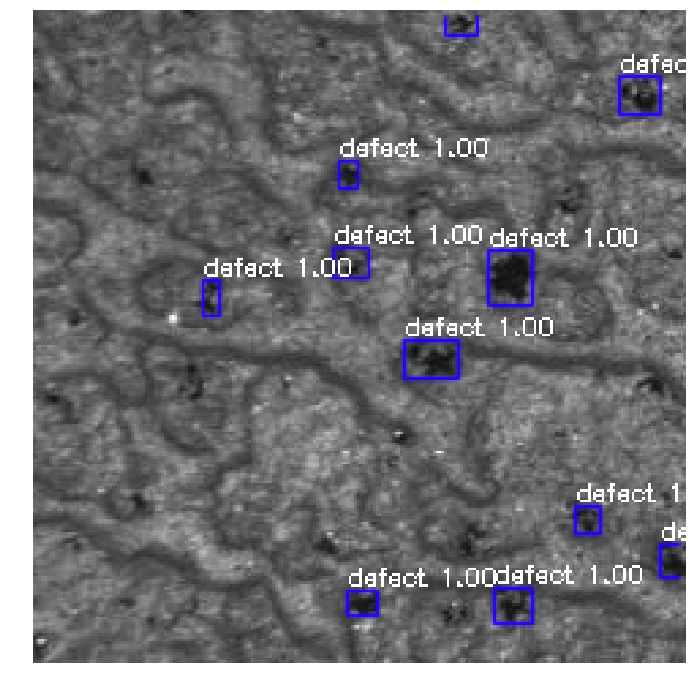

In [28]:
image = read_image_bgr('/home/eric/data/aihub/VOCdevkit/VOC2007/JPEGImages/00008.BMP_block_35.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    print(box,score)
    if score < 0.1:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.2f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(12, 12))
plt.axis('off')
plt.imshow(draw)
plt.show()